## Precipitation extremes and organization metrics, all models together

ROME and Rx1day

ROME and high percentiles

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


switch = {
    'local_files': True, 
    'nci_files': False, 
    }

In [2]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

### Rxday and ROME

In [3]:
model = 'GFDL-CM3'
experiment = 'historical'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
rome = xr.open_dataset(path)
rome

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    rome     (time) float64 ...
    rome_n   (time) float64 ...
Attributes:
    description:  ROME based on all and the 8 largest contiguous convective r...
    units:        km^2

In [4]:
model = 'GFDL-CM3'
experiment = 'historical'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_pr_rxday_' + experiment + '.nc'
path = folder + '/' + fileName
rxday = xr.open_dataset(path)
rxday

<xarray.Dataset>
Dimensions:  (time: 30, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-12-31 00:00:00 ... 1999-12-31 00:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    rx1day   (time, lat, lon) float32 ...
    rx5day   (time, lat, lon) float32 ...

Text(300000.0, 76, 'p-value: 0.232')

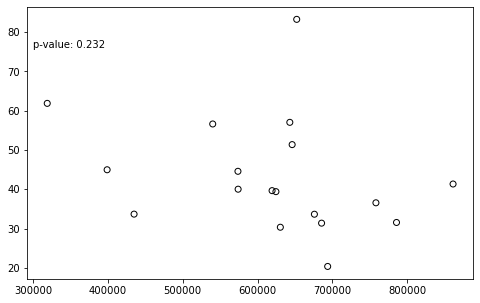

In [23]:
y= []
x= []
for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y = np.append(y, rxday.rx1day.weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time'))

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x = np.append(x, rome.rome.mean(dim='time'))
    
    
fig = plt.figure(figsize=(8,5))
plt.scatter(x,y,facecolors='none', edgecolor='k')
res= stats.pearsonr(x,y)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
plt.text(3e5, 76,'p-value: '+ str(round(res[1],3)),fontsize=10)

# plt.title('Rx1day, all models')
# plt.xlabel('ROME (m$^2$)')
# plt.ylabel('Rx1day (mm/day)')



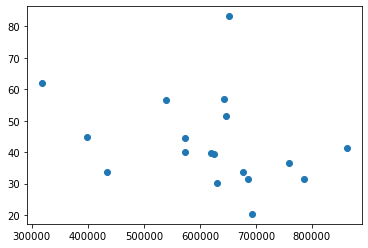

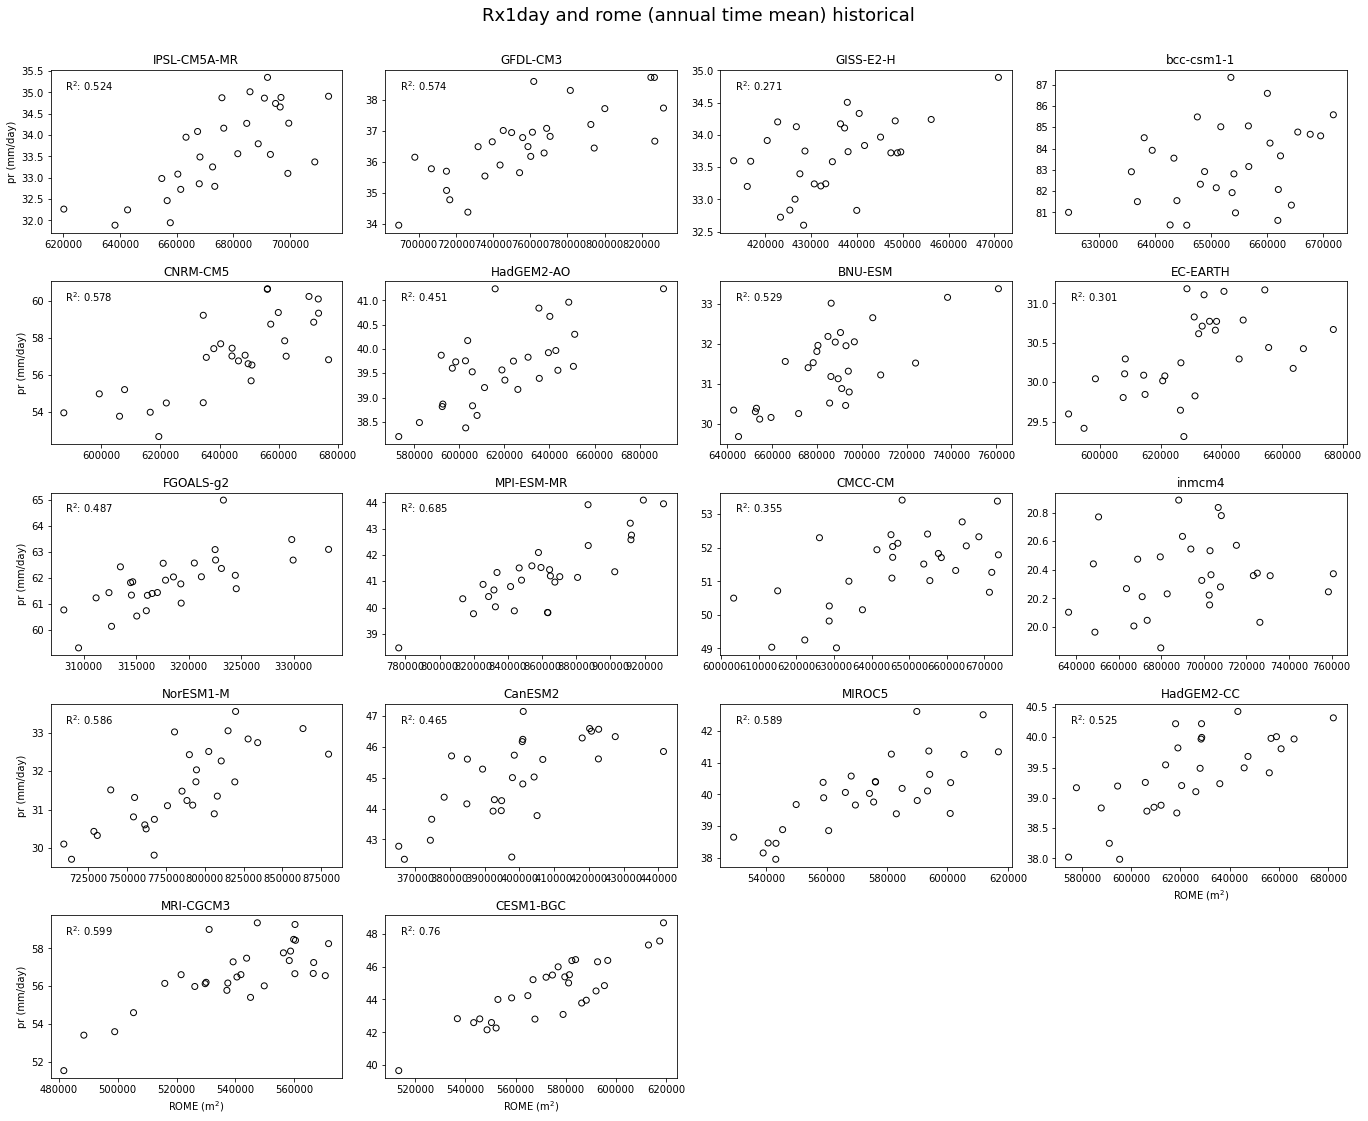

In [8]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle('Rx1day and rome (annual time mean) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)


    ax= fig.add_subplot(5,4,i+1)

    
    x = rome.rome.resample(time='Y').mean(dim='time')
    y = rxday.rx1day.weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon'))
    plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('pr (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)

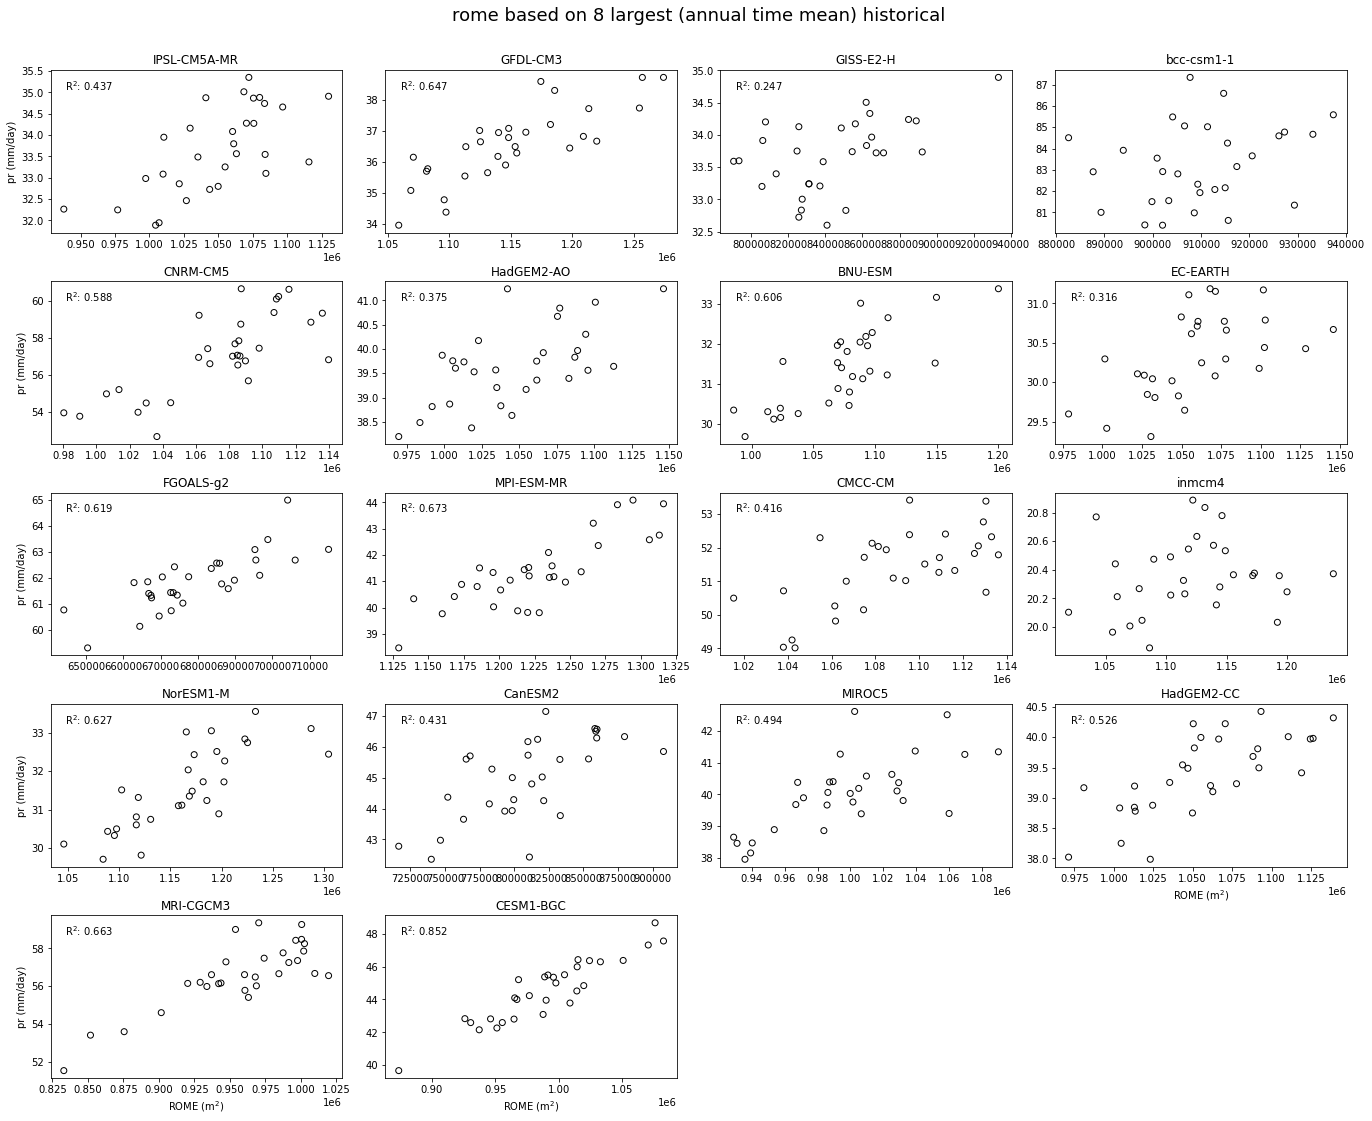

In [9]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle('rome based on 8 largest (annual time mean) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)


    ax= fig.add_subplot(5,4,i+1)

    
    x = rome.rome_n.resample(time='Y').mean(dim='time')
    y = rxday.rx1day.weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon'))
    plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('pr (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)